In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from ipywidgets import interact, Button
import ipywidgets as widgets
import scipy.ndimage as ndimage
from scipy.optimize import curve_fit
from matplotlib.patches import Circle
import xarray
import scipy as sp

In [2]:
sys.path.insert(1, os.path.join(os.path.join(os.path.abspath(""), os.pardir), os.pardir))
import neurotorch as neuro
neuro.Start_Background()
%matplotlib inline

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\abril\.conda\envs\imagej\envs\pyimagej\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "d:\Eigene Datein\Programmieren\Git\abrilka\neurotorch\dev\notebooks\..\..\neurotorch\gui\tab3.py", line 188, in Detect
    self.detectionResult.SetISynapses(self.detectionAlgorithm.Detect(self._gui.IMG))
                                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Eigene Datein\Programmieren\Git\abrilka\neurotorch\dev\notebooks\..\..\neurotorch\utils\detection.py", line 249, in Detect
    _roi = PolygonalSynapseROI().SetPolygon(contour, self.region_props[labels_ok[i]-1])
                                                                       ~~~~~~~~~^^^
IndexError: list index out of range


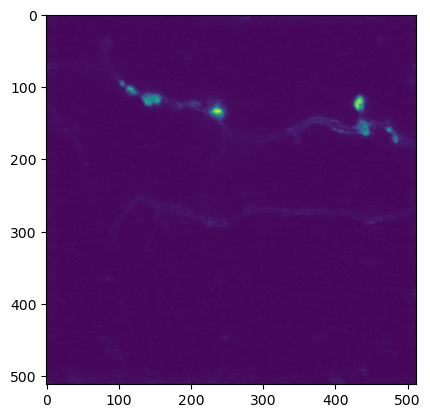

In [5]:
plt.imshow(neuro.API_IMG().imgDiffMaxTime)

In [6]:
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

0.0 1.0
0.0 0.5
0.5 0.0


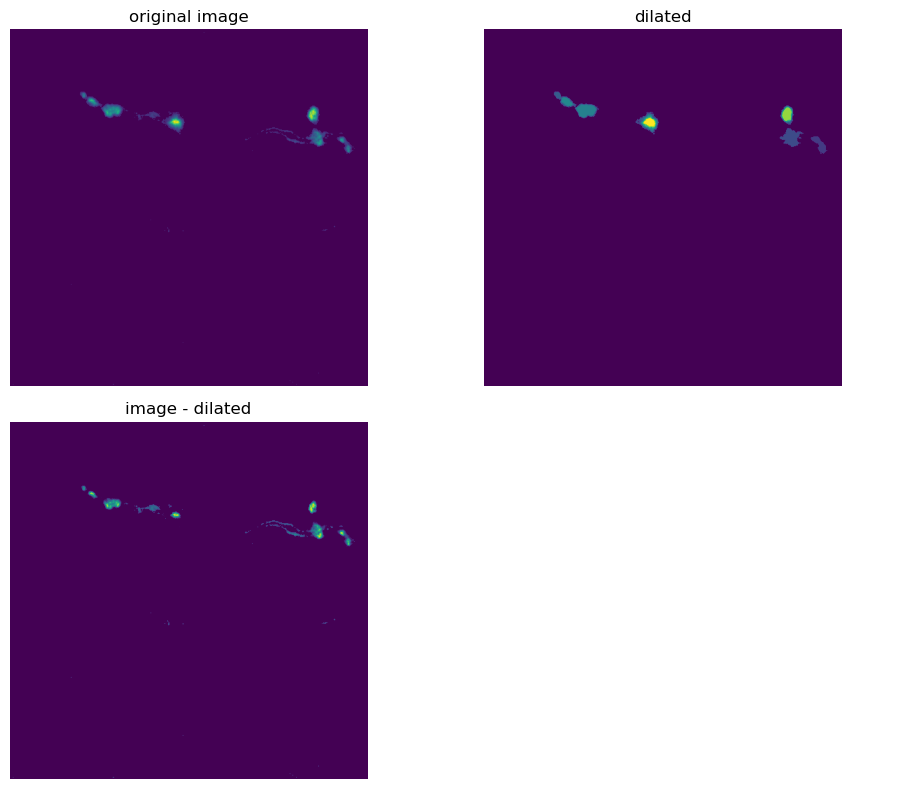

In [50]:
image = neuro.API_IMG().imgDiffMaxTime
#image[image < 8] = 0
image = (image - np.min(image))/(np.max(image) - np.min(image))
print(np.min(image), np.max(image))

seed = np.copy(image)
#seed[1:-1, 1:-1] = image.min()
seed = image - 0.5

dilated = reconstruction(seed, image, method='dilation')
hdome = image - dilated

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(
    nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True
)

#ax0.imshow(image, vmin=image.min(), vmax=0.5*image.max())
ax0.imshow(image)
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated)
print(np.min(dilated), np.max(dilated))
ax1.set_title('dilated')
ax1.axis('off')

print(np.max(hdome), np.min(hdome))
ax2.imshow(hdome)
ax2.set_title('image - dilated')
ax2.axis('off')

ax3.axis("off")

fig.tight_layout()

75


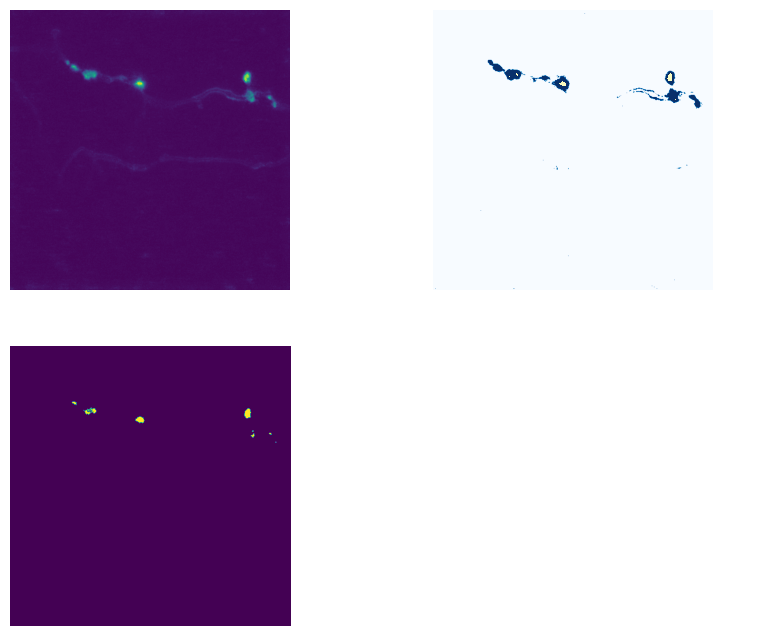

In [142]:
image = np.copy(neuro.API_IMG().imgDiffMaxTime)
thresholded = np.copy(image)
thresholded[thresholded < 8] = 0
thresholded[thresholded > 0] = 1

print(np.max(image))
uthresholded = np.copy(image)
uthresholded[uthresholded < 35] = 0
uthresholded[uthresholded > 0] = 1

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(
    nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True
)
ax0.set_axis_off()
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

ax0.imshow(image)
ax1.imshow(thresholded, cmap="Blues")
ax1.imshow(uthresholded, alpha=uthresholded,  cmap="magma")
ax2.imshow(uthresholded)
plt.show()

In [223]:
#%matplotlib inline
%matplotlib qt
from skimage import measure
# Construct some test data
image = neuro.API_IMG().imgDiffMaxTime
#image[image < 8] = 0
#image = (image - np.min(image))/(np.max(image) - np.min(image))
print(np.min(image), np.max(image))
# Find contours at a constant value of 0.8
contours = measure.find_contours(image,10)

# Display the image and plot all contours found
fig, (ax0, ax1) = plt.subplots(
    nrows=1, ncols=2, figsize=(15, 5), sharex=True, sharey=True
)
ax0.imshow(image)

for contour in contours:
    ax0.plot(contour[:, 1], contour[:, 0], linewidth=2)
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=1)


plt.show()

0 75


In [167]:
%matplotlib qt
from skimage import measure
# Construct some test data
image = neuro.API_IMG().imgDiffMaxTime
print(np.min(image), np.max(image))
# Find contours at a constant value of 0.8
contours = measure.find_contours(image, 20)

# Display the image and plot all contours found
fig, (ax0, ax1) = plt.subplots(
    nrows=1, ncols=2, figsize=(15, 10), sharex=True, sharey=True
)
ax0.imshow(image)

for contour in contours:
    ax0.plot(contour[:, 1], contour[:, 0], linewidth=2)
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=1)


plt.show()

0 75
[[ 98.6        106.        ]
 [ 98.7        105.        ]
 [ 98.54545455 104.        ]
 [ 98.         103.57142857]
 [ 97.         103.        ]
 [ 96.         102.875     ]
 [ 95.5        103.        ]
 [ 95.         103.125     ]
 [ 94.5        103.        ]
 [ 94.         102.75      ]
 [ 93.66666667 103.        ]
 [ 93.         103.33333333]
 [ 92.55555556 104.        ]
 [ 92.5        105.        ]
 [ 92.75       106.        ]
 [ 93.         106.28571429]
 [ 93.71428571 107.        ]
 [ 94.         107.2       ]
 [ 95.         107.375     ]
 [ 96.         107.        ]
 [ 97.         107.44444444]
 [ 97.66666667 107.        ]
 [ 98.         106.6       ]
 [ 98.6        106.        ]]
[[110.16666667 121.        ]
 [110.42857143 120.        ]
 [110.375      119.        ]
 [110.         118.5       ]
 [109.         118.2       ]
 [108.8        118.        ]
 [109.         117.        ]
 [108.         116.42857143]
 [107.25       116.        ]
 [107.         115.5       ]
 [106.8 

(23, 2)


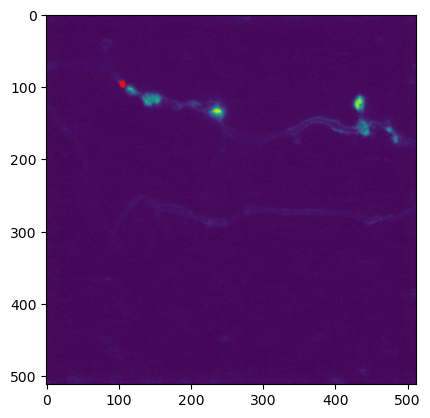

In [196]:
print(contours[0].shape)
plt.imshow(image)
plt.plot(contours[0][:, 1], contours[0][:,0], linewidth=2, c="red")
plt.show()

In [215]:
%matplotlib qt
plt.imshow(measure.grid_points_in_poly((512,512), contours[0]))
plt.plot(contours[0][:, 1], contours[0][:,0], linewidth=2, c="red")

(512, 512)


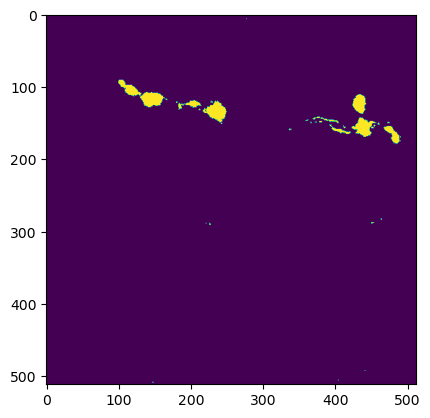

(512, 512)


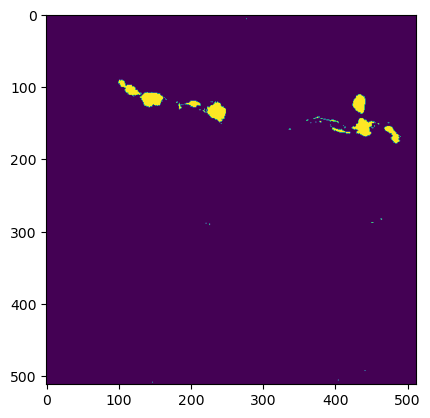

In [224]:
%matplotlib inline
image = neuro.API_IMG().imgDiffMaxTime
contours = measure.find_contours(image, 8)
masks = []
for contour in contours:
    c_mask = measure.grid_points_in_poly((512,512), contour)
    masks.append(c_mask)
mask = np.max(masks, axis=0)
print(mask.shape)
plt.imshow(mask)
plt.show()
thresholded = image > 8
print(thresholded.shape)
plt.imshow(thresholded)
plt.show()

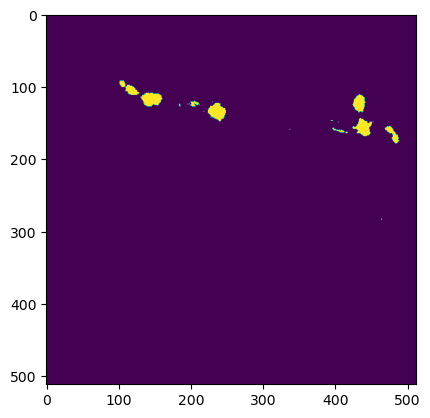

61.0 34.0 1
174.0 55.0 2
420.0 54.0 3
307.0 69.0 4
420.0 75.0 7
382.0 46.0 13
191.0 44.0 17
1.0


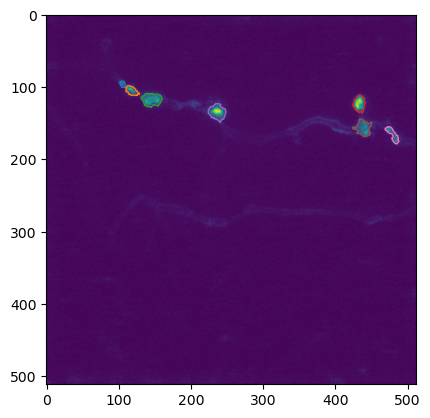

In [287]:
thresholded = (image > 10).astype(int)
thresholded[thresholded > 0] = 1
plt.imshow(thresholded)
#contours = measure.find_contours(image, 10)
#for contour in contours:
#    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.show()
labeled_img = measure.label(thresholded, connectivity=1)
region_props = measure.regionprops(labeled_img, intensity_image=image)

labeled_filtered = np.empty(shape=(512,512))
labels_ok = []

for region in region_props:
    if region.area > 50 and region.intensity_max > 30:
        labels_ok.append(region.label)
        print(region.area, region.intensity_max, region.label)

for l in labels_ok:
    labeled_filtered = np.max([labeled_filtered, labeled_img == l], axis=0)

print(np.max(labeled_filtered))

contours = measure.find_contours(labeled_filtered, 0.9)
plt.imshow(image)
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=1)
plt.show()

In [289]:
%matplotlib qt
thresholded = (image > 15).astype(int)
thresholded[thresholded > 0] = 1
labeled_img = measure.label(thresholded, connectivity=1)
region_props = measure.regionprops(labeled_img, intensity_image=image)
labeled_filtered = np.empty(shape=(512,512))
labels_ok = []

for region in region_props:
    if region.area > 50 and region.intensity_max > 30:
        labels_ok.append(region.label)

for l in labels_ok:
    labeled_filtered = np.max([labeled_filtered, labeled_img == l], axis=0)

contours = measure.find_contours(labeled_filtered, 0.9)
plt.imshow(image)
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=1)
plt.show()

In [1]:
x = []
for i in range(10):
    x.extend([i-1,i,i+1])
print(x)

[-1, 0, 1, 0, 1, 2, 1, 2, 3, 2, 3, 4, 3, 4, 5, 4, 5, 6, 5, 6, 7, 6, 7, 8, 7, 8, 9, 8, 9, 10]


In [10]:
import numpy as np
p = np.array([[98, 112], [100, 113], [101, 108], [97, 107]])
print(p)

[[ 98 112]
 [100 113]
 [101 108]
 [ 97 107]]


In [11]:
p_ = p[:, ::-1]
print(p_)

[[112  98]
 [113 100]
 [108 101]
 [107  97]]


## Contour Finding

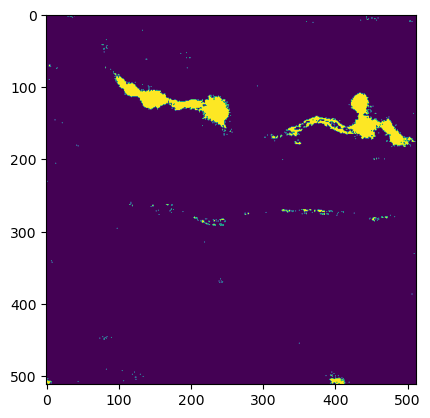

In [12]:
%matplotlib inline
labeledImg = np.copy(neuro.API_GUI().tab3.detectionAlgorithm.labeled_img)
regprops = neuro.API_GUI().tab3.detectionAlgorithm.region_props
plt.imshow(labeledImg > 0)
plt.show()

In [4]:
from skimage import measure
import matplotlib.patches as patches

269


In [31]:
%matplotlib qt
print(np.min(labeledImg), np.max(labeledImg))
ax = plt.subplot()
ax.imshow(labeledImg)
for i in range(1, int(np.max(labeledImg)+1)):
    #contours = measure.find_contours((labeledImg == i).astype(int), 0.9)
    contours = measure.find_contours(np.pad(regprops[i-1].image_filled, 1, constant_values=0), 0.9)
    startX = regprops[i-1].bbox[1] - 1 
    startY = regprops[i-1].bbox[0] - 1
    if len(contours) != 1:
        print(f"To much contours for label {i} ({len(contours)})")
    contour = contours[0][:, ::-1] 
    contour[:, 0] = contour[:, 0] + startX
    contour[:, 1] = contour[:, 1] + startY
    c = patches.Polygon(contour, color="red", fill=False)
    ax.add_patch(c)
print(len(contours))

plt.show()

0 269
1


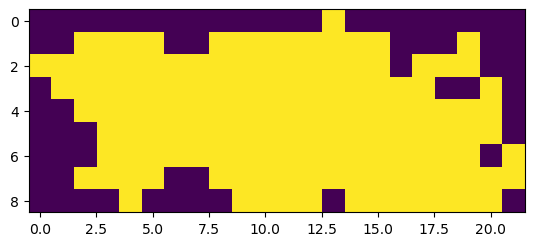

(9, 22)
(11, 24)


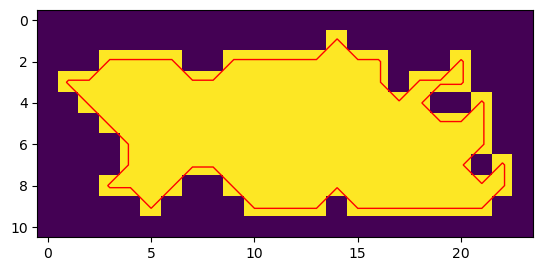

In [28]:
%matplotlib inline
n = 260 
#ax.imshow(labeledImg == n)
_img = regprops[n-1].image_filled
plt.imshow(_img)
plt.show()
print(_img.shape)
ax = plt.subplot()
_img = np.pad(_img, 1, constant_values=0)
print(_img.shape)
ax.imshow(_img)
#contours = measure.find_contours((labeledImg == n).astype(int), 0.9)
contours = measure.find_contours(_img, 0.9)
for contour in contours:
    c = patches.Polygon(contour[:, ::-1] , color="red", fill=False)
    ax.add_patch(c)
plt.show()